In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
import logging
import numpy as np
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [3]:
from qrl_navigation.model import QNetwork
from qrl_navigation.replay_buffer import ReplayBuffer
from qrl_navigation.agent import Agent
from qrl_navigation.environment import BananaMazeEnv
from qrl_navigation.training import dqn_training

In [4]:
maze_env = BananaMazeEnv(train_mode=True)
agent = Agent(maze_env.state_size, maze_env.action_size)

DEBUG:unityagents:The true file name is Banana
DEBUG:unityagents:This is the launch string /home/adam/code/qrl_navigation/notebooks/../bin/unity_banana_maze/Banana.x86_64
INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
scores = dqn_training(agent, maze_env, '../bin/model_weights/weights.pt', n_episodes=2000, logger=logger)

INFO:root:Current eps is 0.995
Episode 1	Average Score: 0.0
INFO:root:Current eps is 0.990025
Episode 2	Average Score: 0.0
INFO:root:Current eps is 0.985074875
Episode 3	Average Score: -0.3333333333333333
INFO:root:Current eps is 0.9801495006250001
Episode 4	Average Score: -0.5
INFO:root:Current eps is 0.9752487531218751
Episode 5	Average Score: -0.6
INFO:root:Current eps is 0.9703725093562657
Episode 6	Average Score: -0.8333333333333334
INFO:root:Current eps is 0.9655206468094844
Episode 7	Average Score: -0.5714285714285714
INFO:root:Current eps is 0.960693043575437
Episode 8	Average Score: -0.5
INFO:root:Current eps is 0.9558895783575597
Episode 9	Average Score: -0.4444444444444444
INFO:root:Current eps is 0.9511101304657719
Episode 10	Average Score: -0.3
INFO:root:Current eps is 0.946354579813443
Episode 11	Average Score: -0.45454545454545453
INFO:root:Current eps is 0.9416228069143757
Episode 12	Average Score: -0.4166666666666667
INFO:root:Current eps is 0.9369146928798039
Episode 

INFO:root:Current eps is 0.6180388156137953
Episode 96	Average Score: 1.4479166666666667
INFO:root:Current eps is 0.6149486215357263
Episode 97	Average Score: 1.4639175257731958
INFO:root:Current eps is 0.6118738784280476
Episode 98	Average Score: 1.469387755102041
INFO:root:Current eps is 0.6088145090359074
Episode 99	Average Score: 1.4444444444444444
INFO:root:Current eps is 0.6057704364907278
Episode 100	Average Score: 1.43
INFO:root:Current eps is 0.6027415843082742
Episode 101	Average Score: 1.43
INFO:root:Current eps is 0.5997278763867329
Episode 102	Average Score: 1.42
INFO:root:Current eps is 0.5967292370047992
Episode 103	Average Score: 1.49
INFO:root:Current eps is 0.5937455908197752
Episode 104	Average Score: 1.54
INFO:root:Current eps is 0.5907768628656763
Episode 105	Average Score: 1.6
INFO:root:Current eps is 0.5878229785513479
Episode 106	Average Score: 1.64
INFO:root:Current eps is 0.5848838636585911
Episode 107	Average Score: 1.65
INFO:root:Current eps is 0.58195944434

INFO:root:Current eps is 0.3614809303671764
Episode 203	Average Score: 4.82
INFO:root:Current eps is 0.3596735257153405
Episode 204	Average Score: 4.85
INFO:root:Current eps is 0.3578751580867638
Episode 205	Average Score: 4.88
INFO:root:Current eps is 0.35608578229633
Episode 206	Average Score: 4.88
INFO:root:Current eps is 0.3543053533848483
Episode 207	Average Score: 4.92
INFO:root:Current eps is 0.35253382661792404
Episode 208	Average Score: 5.02
INFO:root:Current eps is 0.3507711574848344
Episode 209	Average Score: 5.09
INFO:root:Current eps is 0.34901730169741024
Episode 210	Average Score: 5.07
INFO:root:Current eps is 0.3472722151889232
Episode 211	Average Score: 5.13
INFO:root:Current eps is 0.3455358541129786
Episode 212	Average Score: 5.19
INFO:root:Current eps is 0.3438081748424137
Episode 213	Average Score: 5.22
INFO:root:Current eps is 0.3420891339682016
Episode 214	Average Score: 5.28
INFO:root:Current eps is 0.3403786882983606
Episode 215	Average Score: 5.26
INFO:root:Cu

Episode 310	Average Score: 8.35
INFO:root:Current eps is 0.21036724137609603
Episode 311	Average Score: 8.47
INFO:root:Current eps is 0.20931540516921554
Episode 312	Average Score: 8.41
INFO:root:Current eps is 0.20826882814336947
Episode 313	Average Score: 8.45
INFO:root:Current eps is 0.20722748400265262
Episode 314	Average Score: 8.51
INFO:root:Current eps is 0.20619134658263935
Episode 315	Average Score: 8.54
INFO:root:Current eps is 0.20516038984972615
Episode 316	Average Score: 8.64
INFO:root:Current eps is 0.2041345879004775
Episode 317	Average Score: 8.61
INFO:root:Current eps is 0.2031139149609751
Episode 318	Average Score: 8.66
INFO:root:Current eps is 0.20209834538617025
Episode 319	Average Score: 8.67
INFO:root:Current eps is 0.2010878536592394
Episode 320	Average Score: 8.73
INFO:root:Current eps is 0.2000824143909432
Episode 321	Average Score: 8.8
INFO:root:Current eps is 0.19908200231898848
Episode 322	Average Score: 8.8
INFO:root:Current eps is 0.19808659230739353
Episo

INFO:root:Current eps is 0.12365869841532712
Episode 417	Average Score: 11.72
INFO:root:Current eps is 0.12304040492325048
Episode 418	Average Score: 11.7
INFO:root:Current eps is 0.12242520289863423
Episode 419	Average Score: 11.72
INFO:root:Current eps is 0.12181307688414106
Episode 420	Average Score: 11.67
INFO:root:Current eps is 0.12120401149972035
Episode 421	Average Score: 11.69
INFO:root:Current eps is 0.12059799144222175
Episode 422	Average Score: 11.76
INFO:root:Current eps is 0.11999500148501063
Episode 423	Average Score: 11.72
INFO:root:Current eps is 0.11939502647758558
Episode 424	Average Score: 11.75
INFO:root:Current eps is 0.11879805134519765
Episode 425	Average Score: 11.78
INFO:root:Current eps is 0.11820406108847166
Episode 426	Average Score: 11.84
INFO:root:Current eps is 0.1176130407830293
Episode 427	Average Score: 11.89
INFO:root:Current eps is 0.11702497557911415
Episode 428	Average Score: 11.83
INFO:root:Current eps is 0.11643985070121858
Episode 429	Average S

Episode 522	Average Score: 13.5
INFO:root:Current eps is 0.07268942442628039
Episode 523	Average Score: 13.53
INFO:root:Current eps is 0.07232597730414898
Episode 524	Average Score: 13.46
INFO:root:Current eps is 0.07196434741762824
Episode 525	Average Score: 13.48
INFO:root:Current eps is 0.0716045256805401
Episode 526	Average Score: 13.49
INFO:root:Current eps is 0.0712465030521374
Episode 527	Average Score: 13.55
INFO:root:Current eps is 0.0708902705368767
Episode 528	Average Score: 13.53
INFO:root:Current eps is 0.07053581918419231
Episode 529	Average Score: 13.6
INFO:root:Current eps is 0.07018314008827135
Episode 530	Average Score: 13.61
INFO:root:Current eps is 0.06983222438783
Episode 531	Average Score: 13.63
INFO:root:Current eps is 0.06948306326589085
Episode 532	Average Score: 13.61
INFO:root:Current eps is 0.0691356479495614
Episode 533	Average Score: 13.6
INFO:root:Current eps is 0.06878996970981359
Episode 534	Average Score: 13.58
INFO:root:Current eps is 0.06844601986126

INFO:root:Current eps is 0.04294323012606958
Episode 628	Average Score: 14.68
INFO:root:Current eps is 0.04272851397543923
Episode 629	Average Score: 14.65
INFO:root:Current eps is 0.04251487140556204
Episode 630	Average Score: 14.6
INFO:root:Current eps is 0.04230229704853423
Episode 631	Average Score: 14.64
INFO:root:Current eps is 0.04209078556329156
Episode 632	Average Score: 14.65
INFO:root:Current eps is 0.0418803316354751
Episode 633	Average Score: 14.68
INFO:root:Current eps is 0.041670929977297724
Episode 634	Average Score: 14.71
INFO:root:Current eps is 0.04146257532741124
Episode 635	Average Score: 14.64
INFO:root:Current eps is 0.04125526245077418
Episode 636	Average Score: 14.65
INFO:root:Current eps is 0.04104898613852031
Episode 637	Average Score: 14.63
INFO:root:Current eps is 0.04084374120782771
Episode 638	Average Score: 14.67
INFO:root:Current eps is 0.04063952250178857
Episode 639	Average Score: 14.64
INFO:root:Current eps is 0.04043632488927963
Episode 640	Average 

INFO:root:Current eps is 0.02536986677519817
Episode 733	Average Score: 15.64
INFO:root:Current eps is 0.02524301744132218
Episode 734	Average Score: 15.62
INFO:root:Current eps is 0.025116802354115567
Episode 735	Average Score: 15.73
INFO:root:Current eps is 0.024991218342344988
Episode 736	Average Score: 15.76
INFO:root:Current eps is 0.024866262250633264
Episode 737	Average Score: 15.79
INFO:root:Current eps is 0.024741930939380097
Episode 738	Average Score: 15.75
INFO:root:Current eps is 0.024618221284683196
Episode 739	Average Score: 15.78
INFO:root:Current eps is 0.02449513017825978
Episode 740	Average Score: 15.79
INFO:root:Current eps is 0.02437265452736848
Episode 741	Average Score: 15.77
INFO:root:Current eps is 0.024250791254731636
Episode 742	Average Score: 15.66
INFO:root:Current eps is 0.024129537298457977
Episode 743	Average Score: 15.67
INFO:root:Current eps is 0.024008889611965685
Episode 744	Average Score: 15.7
INFO:root:Current eps is 0.023888845163905856
Episode 745

Episode 837	Average Score: 15.24
INFO:root:Current eps is 0.014987930304771725
Episode 838	Average Score: 15.18
INFO:root:Current eps is 0.014912990653247866
Episode 839	Average Score: 15.21
INFO:root:Current eps is 0.014838425699981627
Episode 840	Average Score: 15.17
INFO:root:Current eps is 0.01476423357148172
Episode 841	Average Score: 15.19
INFO:root:Current eps is 0.014690412403624311
Episode 842	Average Score: 15.22
INFO:root:Current eps is 0.01461696034160619
Episode 843	Average Score: 15.2
INFO:root:Current eps is 0.014543875539898159
Episode 844	Average Score: 15.19
INFO:root:Current eps is 0.014471156162198668
Episode 845	Average Score: 15.25
INFO:root:Current eps is 0.014398800381387675
Episode 846	Average Score: 15.12
INFO:root:Current eps is 0.014326806379480736
Episode 847	Average Score: 15.06
INFO:root:Current eps is 0.014255172347583332
Episode 848	Average Score: 15.09
INFO:root:Current eps is 0.014183896485845416
Episode 849	Average Score: 15.11
INFO:root:Current eps 

Episode 947	Average Score: 14.86
INFO:root:Current eps is 0.01
Episode 948	Average Score: 14.82
INFO:root:Current eps is 0.01
Episode 949	Average Score: 14.85
INFO:root:Current eps is 0.01
Episode 950	Average Score: 14.85
INFO:root:Current eps is 0.01
Episode 951	Average Score: 14.82
INFO:root:Current eps is 0.01
Episode 952	Average Score: 14.85
INFO:root:Current eps is 0.01
Episode 953	Average Score: 14.95
INFO:root:Current eps is 0.01
Episode 954	Average Score: 14.95
INFO:root:Current eps is 0.01
Episode 955	Average Score: 15.0
INFO:root:Current eps is 0.01
Episode 956	Average Score: 14.96
INFO:root:Current eps is 0.01
Episode 957	Average Score: 15.01
INFO:root:Current eps is 0.01
Episode 958	Average Score: 15.06
INFO:root:Current eps is 0.01
Episode 959	Average Score: 15.05
INFO:root:Current eps is 0.01
Episode 960	Average Score: 15.05
INFO:root:Current eps is 0.01
Episode 961	Average Score: 15.0
INFO:root:Current eps is 0.01
Episode 962	Average Score: 15.02
INFO:root:Current eps is

INFO:root:Current eps is 0.01
Episode 1077	Average Score: 15.75
INFO:root:Current eps is 0.01
Episode 1078	Average Score: 15.82
INFO:root:Current eps is 0.01
Episode 1079	Average Score: 15.78
INFO:root:Current eps is 0.01
Episode 1080	Average Score: 15.74
INFO:root:Current eps is 0.01
Episode 1081	Average Score: 15.72
INFO:root:Current eps is 0.01
Episode 1082	Average Score: 15.67
INFO:root:Current eps is 0.01
Episode 1083	Average Score: 15.62
INFO:root:Current eps is 0.01
Episode 1084	Average Score: 15.66
INFO:root:Current eps is 0.01
Episode 1085	Average Score: 15.68
INFO:root:Current eps is 0.01
Episode 1086	Average Score: 15.77
INFO:root:Current eps is 0.01
Episode 1087	Average Score: 15.77
INFO:root:Current eps is 0.01
Episode 1088	Average Score: 15.81
INFO:root:Current eps is 0.01
Episode 1089	Average Score: 15.75
INFO:root:Current eps is 0.01
Episode 1090	Average Score: 15.72
INFO:root:Current eps is 0.01
Episode 1091	Average Score: 15.81
INFO:root:Current eps is 0.01
Episode 10

Episode 1205	Average Score: 15.5
INFO:root:Current eps is 0.01
Episode 1206	Average Score: 15.65
INFO:root:Current eps is 0.01
Episode 1207	Average Score: 15.68
INFO:root:Current eps is 0.01
Episode 1208	Average Score: 15.7
INFO:root:Current eps is 0.01
Episode 1209	Average Score: 15.78
INFO:root:Current eps is 0.01
Episode 1210	Average Score: 15.79
INFO:root:Current eps is 0.01
Episode 1211	Average Score: 15.82
INFO:root:Current eps is 0.01
Episode 1212	Average Score: 15.8
INFO:root:Current eps is 0.01
Episode 1213	Average Score: 15.8
INFO:root:Current eps is 0.01
Episode 1214	Average Score: 15.84
INFO:root:Current eps is 0.01
Episode 1215	Average Score: 15.77
INFO:root:Current eps is 0.01
Episode 1216	Average Score: 15.8
INFO:root:Current eps is 0.01
Episode 1217	Average Score: 15.75
INFO:root:Current eps is 0.01
Episode 1218	Average Score: 15.75
INFO:root:Current eps is 0.01
Episode 1219	Average Score: 15.75
INFO:root:Current eps is 0.01
Episode 1220	Average Score: 15.81
INFO:root:C

INFO:root:Current eps is 0.01
Episode 1334	Average Score: 15.85
INFO:root:Current eps is 0.01
Episode 1335	Average Score: 15.9
INFO:root:Current eps is 0.01
Episode 1336	Average Score: 16.0
INFO:root:Current eps is 0.01
Episode 1337	Average Score: 15.97
INFO:root:Current eps is 0.01
Episode 1338	Average Score: 15.99
INFO:root:Current eps is 0.01
Episode 1339	Average Score: 15.94
INFO:root:Current eps is 0.01
Episode 1340	Average Score: 16.01
INFO:root:Current eps is 0.01
Episode 1341	Average Score: 16.02
INFO:root:Current eps is 0.01
Episode 1342	Average Score: 15.95
INFO:root:Current eps is 0.01
Episode 1343	Average Score: 15.96
INFO:root:Current eps is 0.01
Episode 1344	Average Score: 15.96
INFO:root:Current eps is 0.01
Episode 1345	Average Score: 15.92
INFO:root:Current eps is 0.01
Episode 1346	Average Score: 15.91
INFO:root:Current eps is 0.01
Episode 1347	Average Score: 15.9
INFO:root:Current eps is 0.01
Episode 1348	Average Score: 15.93
INFO:root:Current eps is 0.01
Episode 1349	

Episode 1462	Average Score: 15.92
INFO:root:Current eps is 0.01
Episode 1463	Average Score: 15.85
INFO:root:Current eps is 0.01
Episode 1464	Average Score: 15.78
INFO:root:Current eps is 0.01
Episode 1465	Average Score: 15.79
INFO:root:Current eps is 0.01
Episode 1466	Average Score: 15.84
INFO:root:Current eps is 0.01
Episode 1467	Average Score: 15.92
INFO:root:Current eps is 0.01
Episode 1468	Average Score: 15.95
INFO:root:Current eps is 0.01
Episode 1469	Average Score: 15.86
INFO:root:Current eps is 0.01
Episode 1470	Average Score: 15.79
INFO:root:Current eps is 0.01
Episode 1471	Average Score: 15.75
INFO:root:Current eps is 0.01
Episode 1472	Average Score: 15.76
INFO:root:Current eps is 0.01
Episode 1473	Average Score: 15.77
INFO:root:Current eps is 0.01
Episode 1474	Average Score: 15.83
INFO:root:Current eps is 0.01
Episode 1475	Average Score: 15.84
INFO:root:Current eps is 0.01
Episode 1476	Average Score: 15.89
INFO:root:Current eps is 0.01
Episode 1477	Average Score: 15.76
INFO:r

INFO:root:Current eps is 0.01
Episode 1591	Average Score: 14.98
INFO:root:Current eps is 0.01
Episode 1592	Average Score: 14.93
INFO:root:Current eps is 0.01
Episode 1593	Average Score: 14.98
INFO:root:Current eps is 0.01
Episode 1594	Average Score: 14.95
INFO:root:Current eps is 0.01
Episode 1595	Average Score: 15.0
INFO:root:Current eps is 0.01
Episode 1596	Average Score: 15.1
INFO:root:Current eps is 0.01
Episode 1597	Average Score: 15.1
INFO:root:Current eps is 0.01
Episode 1598	Average Score: 15.09
INFO:root:Current eps is 0.01
Episode 1599	Average Score: 15.12
INFO:root:Current eps is 0.01
Episode 1600	Average Score: 15.09
INFO:root:Current eps is 0.01
Episode 1601	Average Score: 15.16
INFO:root:Current eps is 0.01
Episode 1602	Average Score: 15.18
INFO:root:Current eps is 0.01
Episode 1603	Average Score: 15.19
INFO:root:Current eps is 0.01
Episode 1604	Average Score: 15.21
INFO:root:Current eps is 0.01
Episode 1605	Average Score: 15.25
INFO:root:Current eps is 0.01
Episode 1606	

Episode 1719	Average Score: 14.91
INFO:root:Current eps is 0.01
Episode 1720	Average Score: 14.84
INFO:root:Current eps is 0.01
Episode 1721	Average Score: 14.8
INFO:root:Current eps is 0.01
Episode 1722	Average Score: 14.86
INFO:root:Current eps is 0.01
Episode 1723	Average Score: 14.9
INFO:root:Current eps is 0.01
Episode 1724	Average Score: 14.9
INFO:root:Current eps is 0.01
Episode 1725	Average Score: 14.84
INFO:root:Current eps is 0.01
Episode 1726	Average Score: 14.81
INFO:root:Current eps is 0.01
Episode 1727	Average Score: 14.82
INFO:root:Current eps is 0.01
Episode 1728	Average Score: 14.89
INFO:root:Current eps is 0.01
Episode 1729	Average Score: 14.93
INFO:root:Current eps is 0.01
Episode 1730	Average Score: 14.89
INFO:root:Current eps is 0.01
Episode 1731	Average Score: 14.88
INFO:root:Current eps is 0.01
Episode 1732	Average Score: 14.92
INFO:root:Current eps is 0.01
Episode 1733	Average Score: 14.92
INFO:root:Current eps is 0.01
Episode 1734	Average Score: 14.92
INFO:root

INFO:root:Current eps is 0.01
Episode 1848	Average Score: 15.85
INFO:root:Current eps is 0.01
Episode 1849	Average Score: 15.85
INFO:root:Current eps is 0.01
Episode 1850	Average Score: 15.89
INFO:root:Current eps is 0.01
Episode 1851	Average Score: 15.88
INFO:root:Current eps is 0.01
Episode 1852	Average Score: 15.86
INFO:root:Current eps is 0.01
Episode 1853	Average Score: 15.82
INFO:root:Current eps is 0.01
Episode 1854	Average Score: 15.71
INFO:root:Current eps is 0.01
Episode 1855	Average Score: 15.75
INFO:root:Current eps is 0.01
Episode 1856	Average Score: 15.76
INFO:root:Current eps is 0.01
Episode 1857	Average Score: 15.72
INFO:root:Current eps is 0.01
Episode 1858	Average Score: 15.72
INFO:root:Current eps is 0.01
Episode 1859	Average Score: 15.87
INFO:root:Current eps is 0.01
Episode 1860	Average Score: 15.86
INFO:root:Current eps is 0.01
Episode 1861	Average Score: 15.8
INFO:root:Current eps is 0.01
Episode 1862	Average Score: 15.7
INFO:root:Current eps is 0.01
Episode 1863

Episode 1976	Average Score: 15.53
INFO:root:Current eps is 0.01
Episode 1977	Average Score: 15.53
INFO:root:Current eps is 0.01
Episode 1978	Average Score: 15.63
INFO:root:Current eps is 0.01
Episode 1979	Average Score: 15.58
INFO:root:Current eps is 0.01
Episode 1980	Average Score: 15.64
INFO:root:Current eps is 0.01
Episode 1981	Average Score: 15.72
INFO:root:Current eps is 0.01
Episode 1982	Average Score: 15.85
INFO:root:Current eps is 0.01
Episode 1983	Average Score: 15.9
INFO:root:Current eps is 0.01
Episode 1984	Average Score: 15.97
INFO:root:Current eps is 0.01
Episode 1985	Average Score: 16.02
INFO:root:Current eps is 0.01
Episode 1986	Average Score: 16.04
INFO:root:Current eps is 0.01
Episode 1987	Average Score: 16.09
INFO:root:Current eps is 0.01
Episode 1988	Average Score: 16.15
INFO:root:Current eps is 0.01
Episode 1989	Average Score: 16.14
INFO:root:Current eps is 0.01
Episode 1990	Average Score: 16.15
INFO:root:Current eps is 0.01
Episode 1991	Average Score: 16.11
INFO:ro

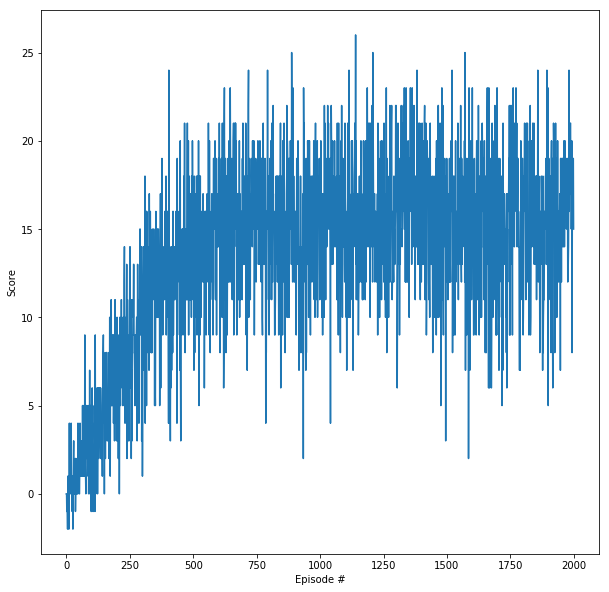

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
maze_env.close()